# Multiple Linear Regression
## We have used `Diabetes` dataset which is bundled with scikit-learn package 
### Load the dataset

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

### Description of the dataset

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### First check the shape of the dataset
#### `data` attribute will give the `independent variables` and `target` will give the `dependent variable`
#### In the dataset we have 10 independent variables and dependent variable as disease progression

In [4]:
print(f'  Data shape = {diabetes.data.shape}')
print(f'Target shape = {diabetes.target.shape}')

  Data shape = (442, 10)
Target shape = (442,)


In [5]:
print("Below are independent variables in dataset:")
print(diabetes.feature_names)

Below are independent variables in dataset:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Exploratory Data Analysis
### Load data into a dataframe and performed Explorative Data Analysis

In [6]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, 
                             columns=diabetes.feature_names)

#Map target dependent variable from diabetes dataset into Disease_Progression column in dataframe
diabetes_df['Disease_Progression'] = pd.Series(diabetes.target)

max(diabetes_df['Disease_Progression'])

346.0

In [7]:
#List the datatypes of diabetes dataframe
diabetes_df.dtypes

age                    float64
sex                    float64
bmi                    float64
bp                     float64
s1                     float64
s2                     float64
s3                     float64
s4                     float64
s5                     float64
s6                     float64
Disease_Progression    float64
dtype: object

In [8]:
# Check the shape of dataframe
diabetes_df.shape

(442, 11)

#### It shows 11 columns : 1(dependent)+10(independent variables)

### Data Transformation and Cleanup

 **1.Check for duplicate rows and nulls and remove if any**

In [9]:
duplicate_rows = diabetes_df[diabetes_df.duplicated()]  #Checking the data for duplicates rows if any
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 11)


In [10]:
print(diabetes_df.isnull().sum())    ##Checking the data for null values if any

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
Disease_Progression    0
dtype: int64


**There is no duplicate rows and null values in data.**

**2. Further explore data and set dataframe attributes**

In [11]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 12)
pd.set_option('display.width', None)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


**3. Change the Column names**

In [12]:
diabetes_df.columns = ['Age', 'Sex', 'BMI', 'AVG_BP', 'BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6','Disease_Progression']

In [13]:
diabetes_df.tail()

,Age,Sex,BMI,AVG_BP,BS1,BS2,BS3,BS4,BS5,BS6,Disease_Progression
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0
441,-0.0455,-0.0446,-0.0730,-0.0814,0.0837,0.0278,0.1738,-0.0395,-0.0042,0.0031,57.0


In [14]:
diabetes_df.describe()

,Age,Sex,BMI,AVG_BP,BS1,BS2,BS3,BS4,BS5,BS6,Disease_Progression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6343e-16,1.3083e-16,-8.0453e-16,1.2817e-16,-8.8353e-17,1.3270e-16,-4.5746e-16,3.7773e-16,-3.8309e-16,-3.4129e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


### Random sample (10%)

In [15]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

## Data visualizations
### Scatter plot with regression line for each independent variable vs dependent variable for random samples from dataset

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style('white')


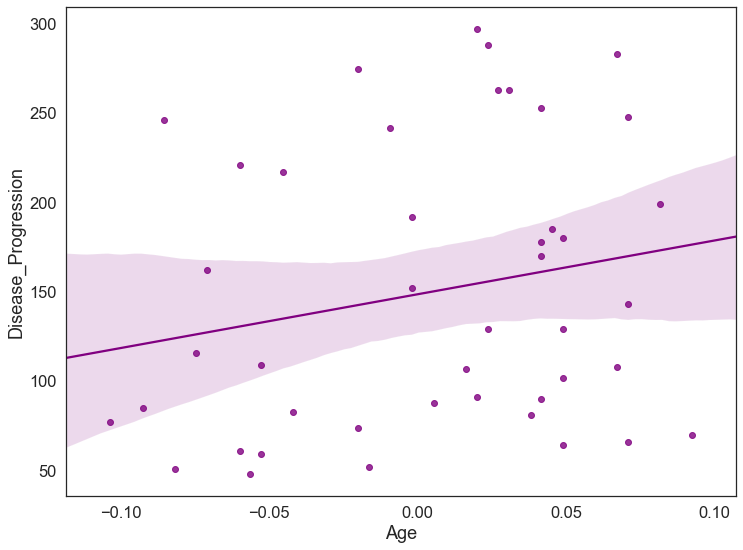

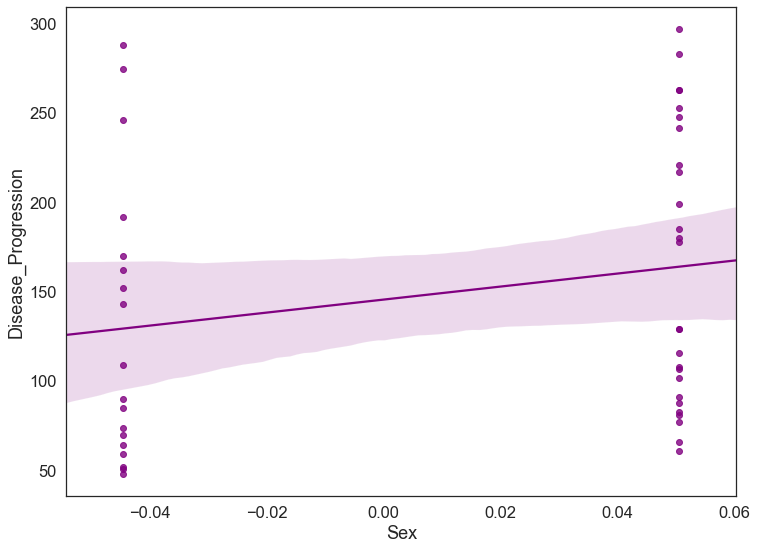

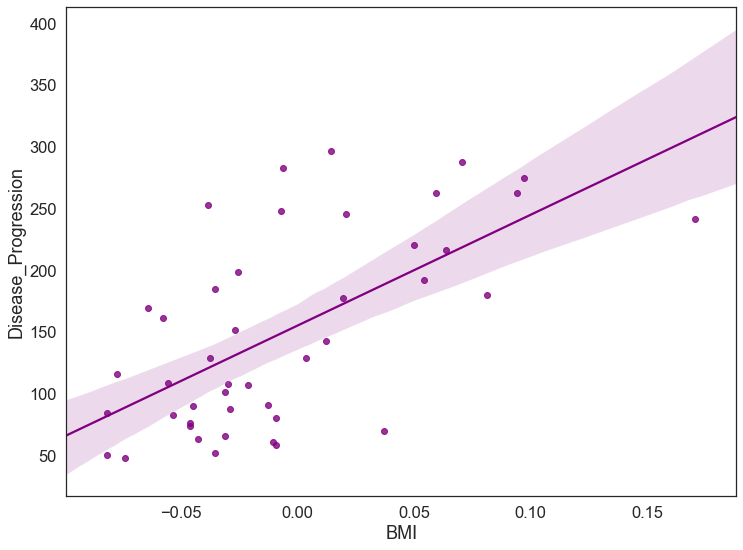

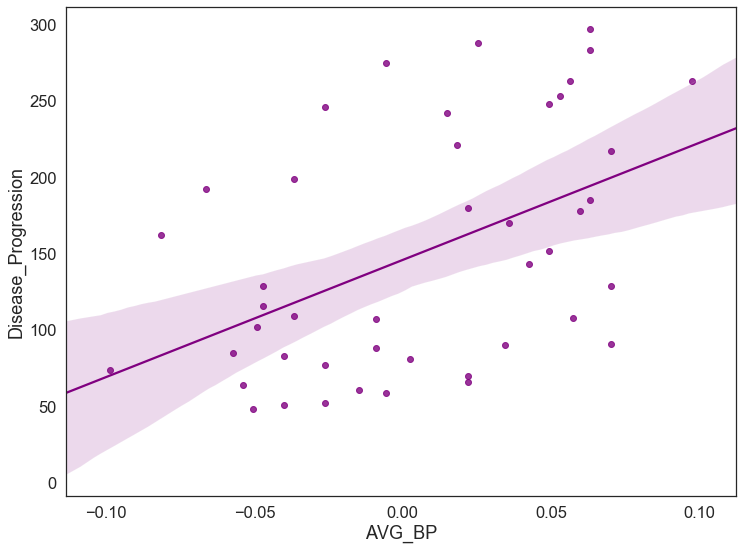

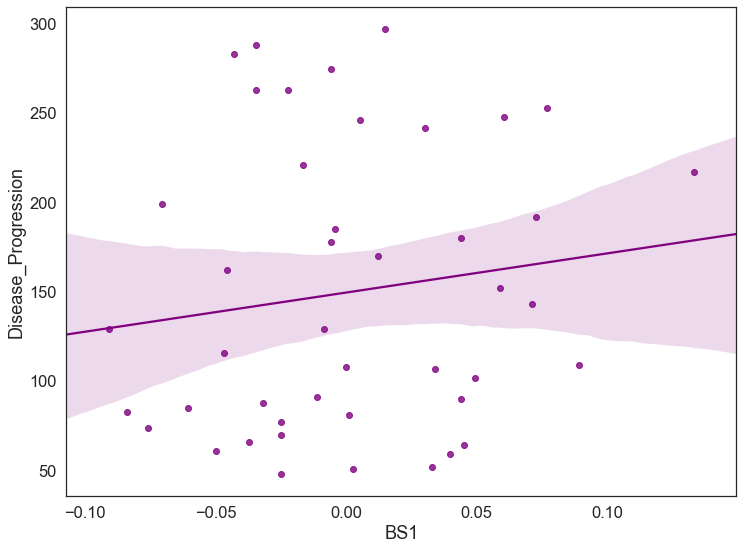

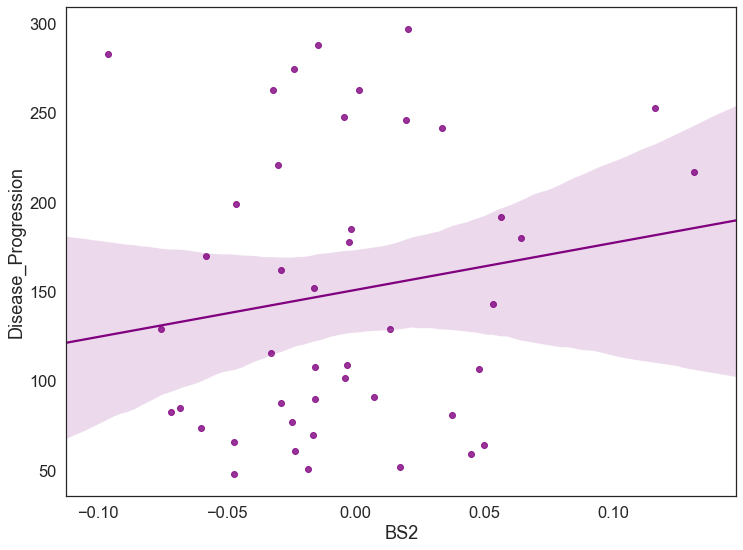

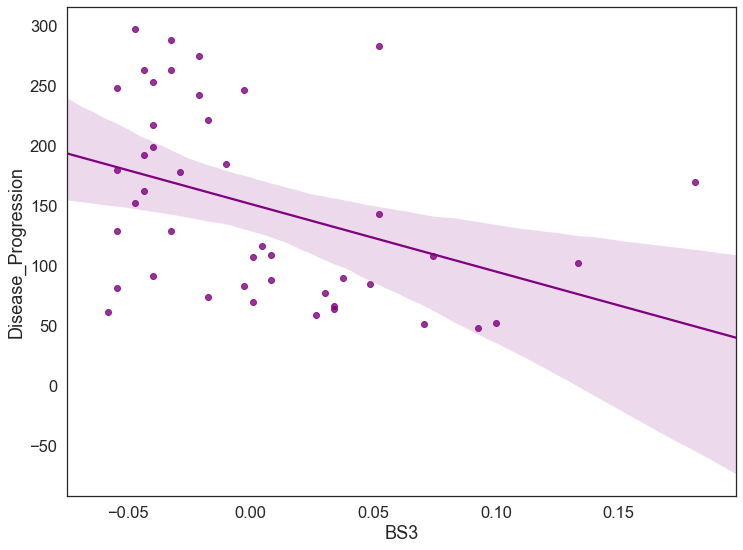

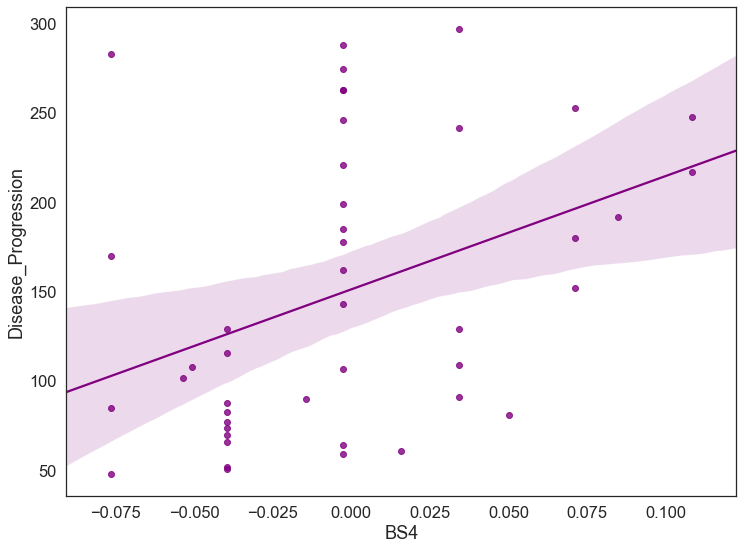

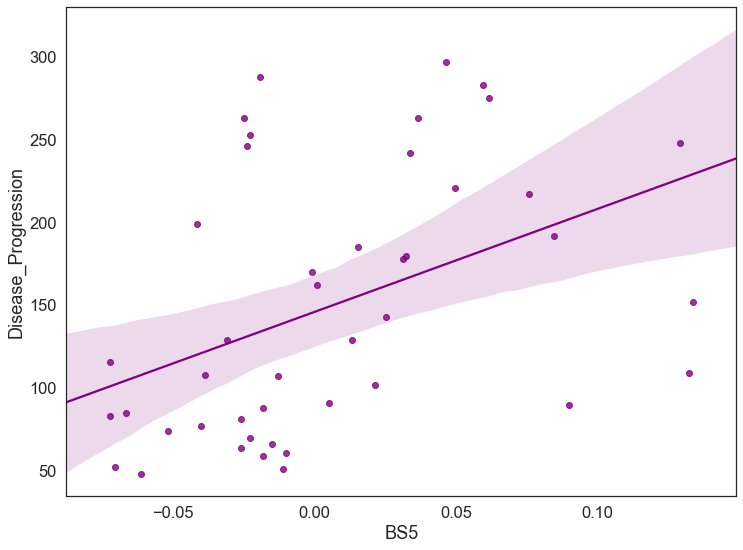

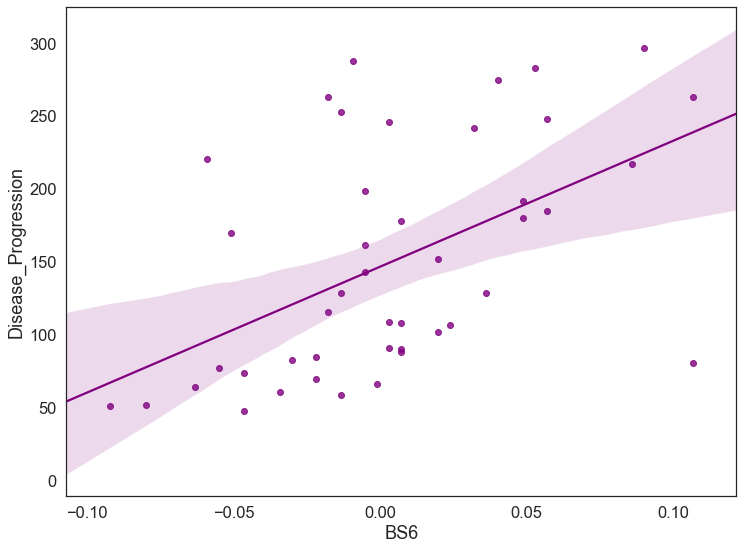

In [17]:
for feature in diabetes_df.columns:
    if feature != "Disease_Progression":
        plt.figure(figsize=(12, 9))
   
        sns.regplot(data=sample_df,x=feature, y='Disease_Progression',color='Purple')

### Detecting Outliers
#### Checking the outliers for two independent variables and dependent variable by using boxplot

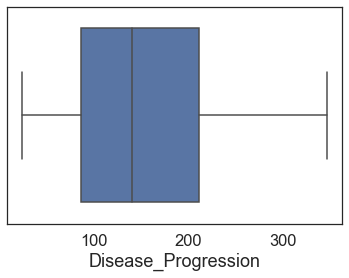

In [18]:
import seaborn as sns
sns.boxplot(x=diabetes_df['Disease_Progression'])

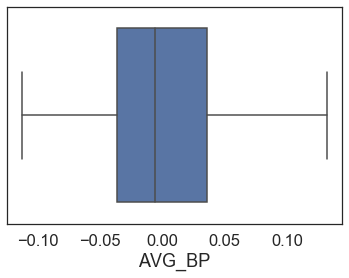

In [19]:
sns.boxplot(x=diabetes_df['AVG_BP'])

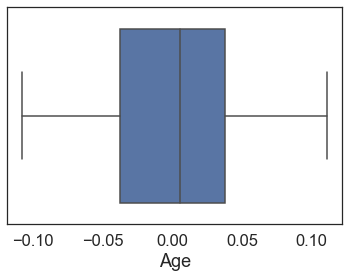

In [20]:
sns.boxplot(x=diabetes_df['Age'])

***Data looks fine and we will go ahead with complete dataset for training and tetsing the linear model.***

## Split the data for training and testing

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(diabetes.data, diabetes.target, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (331, 10)
Shape of testing  set = (111, 10)


#### We know training data should be 60-80% and test data should be 40-20% of actual dataset
#### After splitting our dataset Training data is 70% of actual dataset(442) and test data is 30%.

## Train the model 

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

        age: -60.22189333188298121513
        sex: -266.45890749037573641544
        bmi: 523.05967480200445152150
         bp: 310.51485159166941230069
         s1: -336.17030792548035833534
         s2: 137.34454453829528119968
         s3: -131.13560429688550357241
         s4:  -1.14855015890576539483
         s5: 622.33749249057848373923
         s6:  60.46751763603528928570

y-intercept: 152.22835839334243246412


**From the values of coefficients for each independent variable we can conclude that :**
* bmi and s5 have the strong influence as the value of coefficients is highest. BMI(Body mass index) increases suggests that disease progression will be more for that person.
* The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. In our data age,sex,S1,S3 and S4 have negative influence and the rest have positive influence on dependent variable.
* As the value of variables with negative coefficients increases, value of dependent variable(disease progression) decreases.
* It means if BP increases by 1 then disease progression increases by 310.
* From the data and coefficients we can say independent variable S4 has least influence on dependent variable. As the value of coeffiecient for S4 is least (-1).

## Test the model

In [23]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.2f}\n')



coefficient of determination = 0.5
     correlation coefficient = 0.73



## Visualize the expected vs. predicted progression 

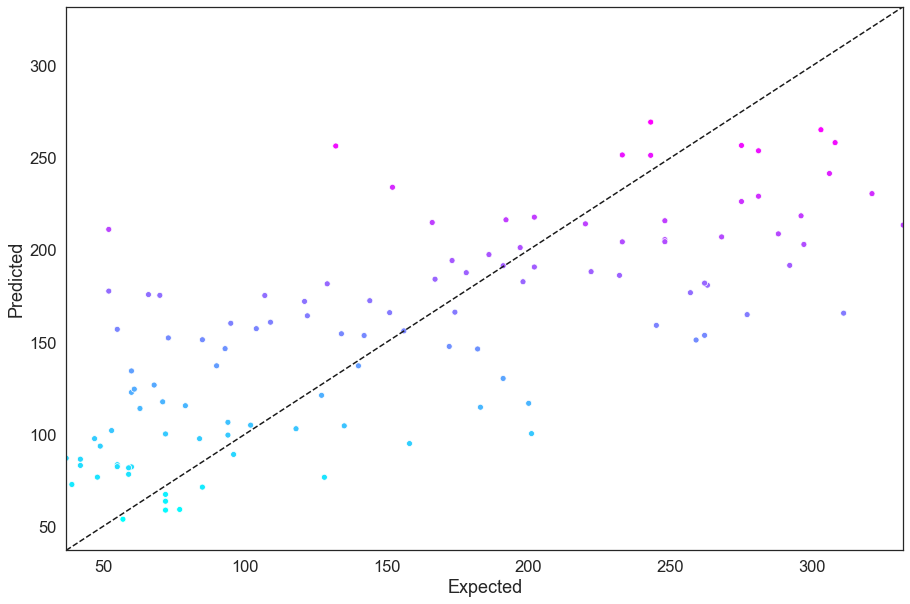

In [24]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')



In [25]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}, difference: {p - e:.2f}')

predicted: 115.47, expected: 79.00, difference: 36.47
predicted: 230.56, expected: 321.00, difference: -90.44
predicted: 160.21, expected: 95.00, difference: 65.21
predicted: 82.26, expected: 60.00, difference: 22.26
predicted: 53.86, expected: 57.00, difference: -3.14
predicted: 154.51, expected: 134.00, difference: 20.51
predicted: 186.20, expected: 232.00, difference: -45.80
predicted: 126.68, expected: 68.00, difference: 58.68
predicted: 86.45, expected: 42.00, difference: 44.45
predicted: 165.97, expected: 151.00, difference: 14.97
predicted: 175.28, expected: 107.00, difference: 68.28
predicted: 113.97, expected: 63.00, difference: 50.97
predicted: 76.70, expected: 48.00, difference: 28.70
predicted: 102.98, expected: 118.00, difference: -15.02
predicted: 190.73, expected: 202.00, difference: -11.27
predicted: 241.49, expected: 306.00, difference: -64.51
predicted: 234.02, expected: 152.00, difference: 82.02
predicted: 251.54, expected: 233.00, difference: 18.54
predicted: 104.54

### Validation of Regression model:

1. The goodness of a fit in a regression model is assessed by **coefficient of determination(r2)** value. Here in our model, we got the r2 value as `0.5` which can be interpreted as independent variables collectively determines 50% in the variation of Disease progression.

2. The **correlation coefficient(r)** of the predicted and expected values came out to be `0.73`  which falls between +0.5 < r < 0.8. As per the properties, we can classify the relationship between these values on dependent variables as `moderate relationship`.

3. The scatterplot of predicted vs expected graph shows that all the data points are closer to the regression line. Also, the differences between predicted and expected values are small and unbiased.

4. Hence we can conclude that our model fits the data well as the fitted values are not systematically too high or too low anywhere in the observation space.

